## Load Baltimore.csv dataset

In [107]:
import pandas as pd

# Specify the file path to your CSV file
file_path = "/Users/BenAbril/Desktop/IS 428/Baltimore911.csv"

# Use the read_csv function to load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

# Now, you can work with the 'df' DataFrame, which contains your dataset
# For example, you can display the first few rows of the dataset:
print(df.head())


    CrimeDate CrimeTime CrimeCode            Location          Description  \
0  02/08/2020   2:18:00        5D  1700 CLIFTVIEW AVE             BURGLARY   
1  02/08/2020   6:00:00        6G   700 N STREEPER ST              LARCENY   
2  02/08/2020   9:50:00       3JF     1400 N BROADWAY  ROBBERY - RESIDENCE   
3  02/08/2020   9:50:00       3JF     1400 N BROADWAY  ROBBERY - RESIDENCE   
4  02/08/2020  17:30:00        5A    1600 E OLIVER ST             BURGLARY   

  Inside/Outside   Weapon   Post District     Neighborhood  Longitude  \
0              I      NaN  312.0  EASTERN      DARLEY PARK -76.593870   
1              I      NaN  333.0  EASTERN  MADISON EASTEND -76.577425   
2              I  FIREARM  314.0  EASTERN           OLIVER -76.594992   
3              I  FIREARM  314.0  EASTERN           OLIVER -76.594992   
4              I      NaN  314.0  EASTERN           OLIVER -76.595946   

    Latitude  Location 1             Premise  vri_name1  Total Incidents  
0  39.315341     

/var/folders/gx/13x6h6z53vs4f9b9g03mfszr0000gp/T/ipykernel_64590/3908171422.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


## Modify Weapon column to ensure all rows contain a string data type

In [108]:
# Specify the column you want to check and modify
column_name = 'Weapon'

# Initialize an empty list to store the row indices with mixed data types
mixed_data_indices = []

# Loop through the DataFrame and check for mixed data types in the specified column
for index, value in enumerate(df[column_name]):
    if not isinstance(value, str):
        # If the value is not a string, it indicates mixed data types
        mixed_data_indices.append(index)

# Replace rows with mixed data types in the 'Weapon' column with 'NA'
for index in mixed_data_indices:
    df.at[index, column_name] = 'NA'

# Now, the 'Weapon' column has 'NA' for rows with mixed data types
print(df['Weapon'])


0              NA
1              NA
2         FIREARM
3         FIREARM
4              NA
           ...   
292756      OTHER
292757      OTHER
292758      OTHER
292759      OTHER
292760      OTHER
Name: Weapon, Length: 292761, dtype: object


## Verify Weapon column has no more mixed data types

In [109]:
# Specify the column you want to check for mixed data types
column_name = 'Weapon'  # Replace with the actual column name

# Initialize an empty list to store the row indices with mixed data types
mixed_data_indices = []

# Loop through the DataFrame and check for mixed data types in the specified column
for index, value in enumerate(df[column_name]):
    if not isinstance(value, str):
        # If the value is not a string, it indicates mixed data types
        mixed_data_indices.append(index)

# Print the row indices with mixed data types
print("Row indices with mixed data types in column '{}':".format(column_name))
print(mixed_data_indices)


Row indices with mixed data types in column 'Weapon':
[]


## Remove Location 1 column from the dataset

In [110]:
# Check the current columns in the DataFrame
print("Columns before removing 'Location 1':")
print(df.columns)

# Remove the 'Location 1' column
df = df.drop(columns=['Location 1'])

# Check the columns after removing 'Location 1'
print("\nColumns after removing 'Location 1':")
print(df.columns)


Columns before removing 'Location 1':
Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Location 1', 'Premise', 'vri_name1',
       'Total Incidents'],
      dtype='object')

Columns after removing 'Location 1':
Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Premise', 'vri_name1', 'Total Incidents'],
      dtype='object')


## Identify the # of rows and columns in the dataset

In [111]:
# Use the shape attribute to get the number of rows and columns
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 292761
Number of columns: 15


## Create a data profile of the dataset

In [112]:
# Create a data profile dictionary to store information about each column
data_profile = {}

# Iterate through each column
for column in df.columns:
    column_data = df[column]

    # Determine data type
    data_type = str(column_data.dtype)

    # Initialize profile information
    profile_info = {
        'Data Type': data_type,
        'Spatial Category': 'Yes' if 'latitude' in column.lower() or 'longitude' in column.lower() else 'No',
        'Temporal Category': 'Yes' if 'date' in column.lower() or 'time' in column.lower() else 'No',
    }

    # Calculate statistics for numeric attributes
    if column_data.dtype in ['int64', 'float64']:
        profile_info['Minimum'] = column_data.min()
        profile_info['Maximum'] = column_data.max()
        profile_info['Mean'] = column_data.mean()
        profile_info['Median'] = column_data.median()
        profile_info['Standard Deviation'] = column_data.std()

    # Calculate the number of unique values for discrete attributes
    elif column_data.dtype == 'object':
        profile_info['Unique Values'] = len(column_data.unique())

    # Add the profile information to the dictionary
    data_profile[column] = profile_info

# Print the data profile
for column, info in data_profile.items():
    print(f"Column: {column}")
    for key, value in info.items():
        print(f"{key}: {value}")
    print("\n")


Column: CrimeDate
Data Type: object
Spatial Category: No
Temporal Category: Yes
Unique Values: 2300


Column: CrimeTime
Data Type: object
Spatial Category: No
Temporal Category: Yes
Unique Values: 1476


Column: CrimeCode
Data Type: object
Spatial Category: No
Temporal Category: No
Unique Values: 81


Column: Location
Data Type: object
Spatial Category: No
Temporal Category: No
Unique Values: 27065


Column: Description
Data Type: object
Spatial Category: No
Temporal Category: No
Unique Values: 14


Column: Inside/Outside
Data Type: object
Spatial Category: No
Temporal Category: No
Unique Values: 5


Column: Weapon
Data Type: object
Spatial Category: No
Temporal Category: No
Unique Values: 6


Column: Post
Data Type: object
Spatial Category: No
Temporal Category: No
Unique Values: 260


Column: District
Data Type: object
Spatial Category: No
Temporal Category: No
Unique Values: 10


Column: Neighborhood
Data Type: object
Spatial Category: No
Temporal Category: No
Unique Values: 279


C

## Clean the Inside/Outside column so that there are only 3 values: I, O, nan

In [113]:
import pandas as pd
import numpy as np

# Specify the column name
column_name = 'Inside/Outside'

# Replace "Inside" with "I" and "Outside" with "O" in the specified column
df[column_name] = df[column_name].replace({"Inside": "I", "Outside": "O"})

# Convert "nan" strings to actual NaN (missing value)
df[column_name].replace("nan", np.nan, inplace=True)

# Display the unique values in the modified column
unique_values = df[column_name].unique()
print(f"Unique values in column '{column_name}':")
for value in unique_values:
    print(value)


Unique values in column 'Inside/Outside':
I
O
nan


## Determine the 3 columns with the largest count

In [114]:
import pandas as pd

# Calculate the number of non-null values (non-missing data) for each column
column_counts = df.count()

# Find the top three columns with the largest number of non-null values
top_columns = column_counts.nlargest(3)

print("Top Three Columns with the Largest Number of Non-Null Values:")
print(top_columns)


Top Three Columns with the Largest Number of Non-Null Values:
CrimeDate      292761
CrimeCode      292761
Description    292761
dtype: int64


## Calculate the missingess % for each column

In [115]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to store the missingness information
missingness_info = pd.DataFrame({'Column Name': missing_percentage.index, 'Missing Percentage': missing_percentage.values})

# Sort the DataFrame by missing percentage in descending order
missingness_info = missingness_info.sort_values(by='Missing Percentage', ascending=False)

# Display the missingness information
print("Missingness Information for Each Column:")
print(missingness_info)


Missingness Information for Each Column:
        Column Name  Missing Percentage
13        vri_name1           88.186951
12          Premise           11.617668
5    Inside/Outside           11.531591
9      Neighborhood            3.587910
7              Post            0.811584
10        Longitude            0.558476
11         Latitude            0.558476
3          Location            0.456345
1         CrimeTime            0.008881
0         CrimeDate            0.000000
2         CrimeCode            0.000000
4       Description            0.000000
6            Weapon            0.000000
8          District            0.000000
14  Total Incidents            0.000000


## Graphs the overall crime incidence on a year-by-year basis

Filters out instances outside of 2014-2020

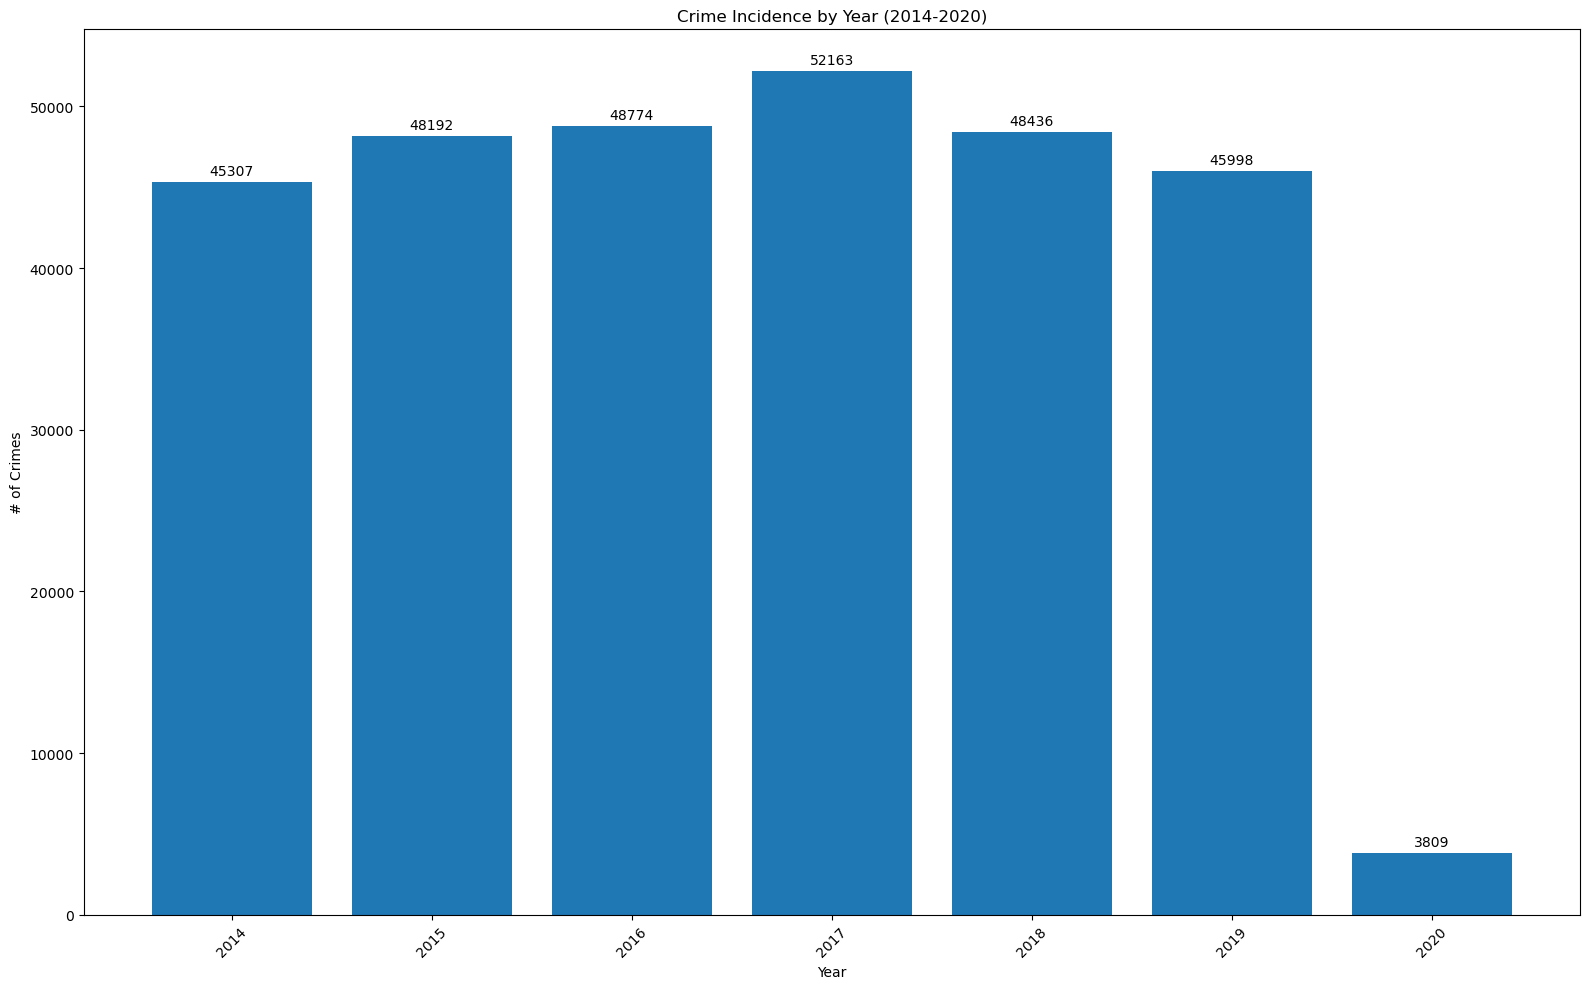

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the year from the "CrimeDate" column
df['Year'] = pd.to_datetime(df['CrimeDate']).dt.year

# Filter the data for years 2014 to 2020
filtered_df = df[(df['Year'] >= 2014) & (df['Year'] <= 2020)]

# Count the occurrences of each year in the filtered data
year_counts = filtered_df['Year'].value_counts().sort_index()

# Create a bar chart with an expanded box size
plt.figure(figsize=(16, 10))  # Adjust the figsize as needed for your preferred dimensions
bars = plt.bar(year_counts.index, year_counts.values)
plt.xlabel("Year")
plt.ylabel("# of Crimes")
plt.title("Crime Incidence by Year (2014-2020)")
plt.xticks(rotation=45)

# Add text labels for the number of crimes on top of each bar, horizontally
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')  # Horizontal text labels

plt.tight_layout()
plt.show()


## Graphs the overall crime incidence on a month-by-month basis

Filters out instances outside of 2014-2020

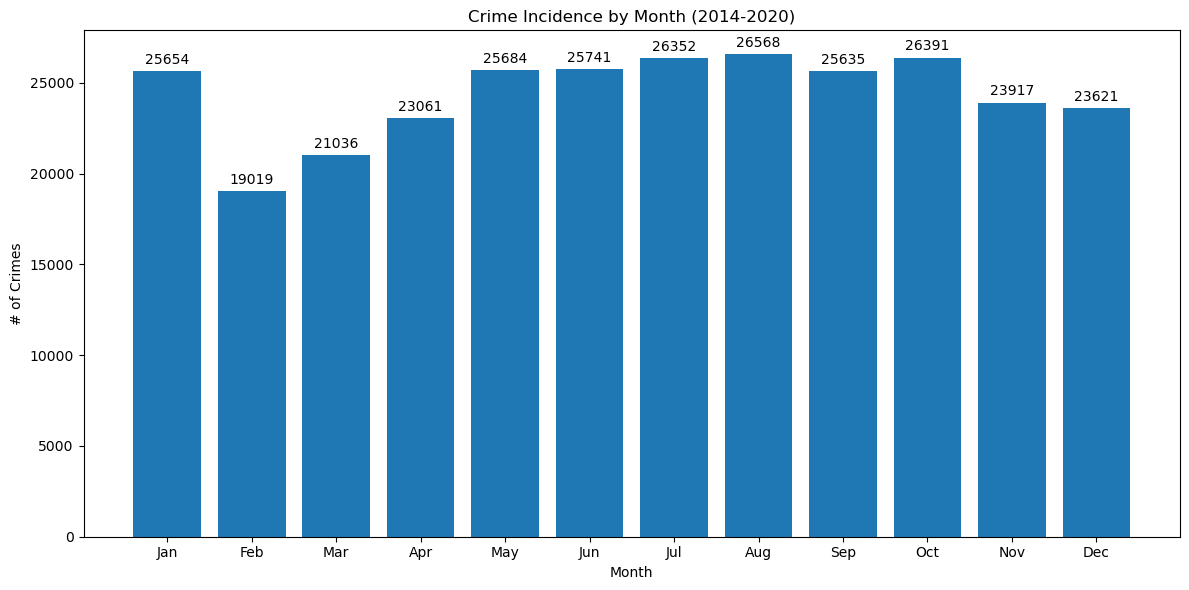

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the "CrimeDate" column to datetime
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Filter the data for years 2014 to 2020
df = df[(df['CrimeDate'].dt.year >= 2014) & (df['CrimeDate'].dt.year <= 2020)]

# Extract the month from the "CrimeDate" column
df['Month'] = df['CrimeDate'].dt.month

# Count the occurrences of each month
month_counts = df['Month'].value_counts().sort_index()

# Create a bar chart for overall crime incidence on a month-by-month basis
plt.figure(figsize=(12, 6))
bars = plt.bar(month_counts.index, month_counts.values)
plt.xlabel("Month")
plt.ylabel("# of Crimes")
plt.title("Crime Incidence by Month (2014-2020)")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()

# Add labels for the number of crimes on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(int(height)),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()


## Graphs the overall crime incidence on a day-of-the-week basis

Filters out instances outside of 2014-2020

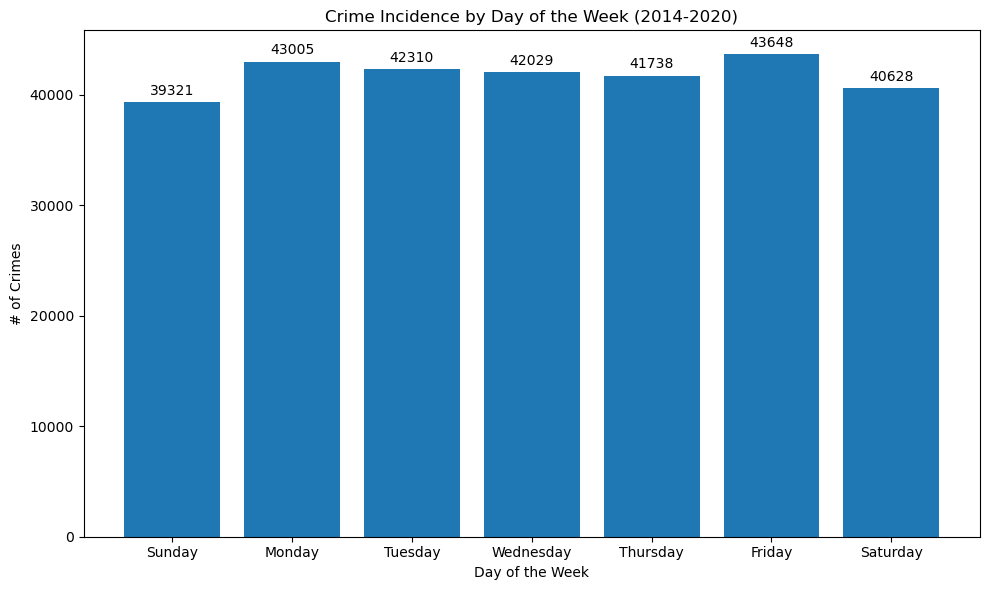

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the "CrimeDate" column to datetime
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Filter the data for years 2014 to 2020
df = df[(df['CrimeDate'].dt.year >= 2014) & (df['CrimeDate'].dt.year <= 2020)]

# Extract the day of the week from the "CrimeDate" column
df['DayOfWeek'] = df['CrimeDate'].dt.day_name()

# Count the occurrences of each day of the week
day_counts = df['DayOfWeek'].value_counts().reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Create a bar chart for overall crime incidence on a day-of-the-week basis
plt.figure(figsize=(10, 6))
bars = plt.bar(day_counts.index, day_counts.values)
plt.xlabel("Day of the Week")
plt.ylabel("# of Crimes")
plt.title("Crime Incidence by Day of the Week (2014-2020)")
plt.tight_layout()

# Add labels for the number of crimes on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(int(height)),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()


## Creates a graph describing the distribution of crime type aggregating from all geo-locations and all time periods

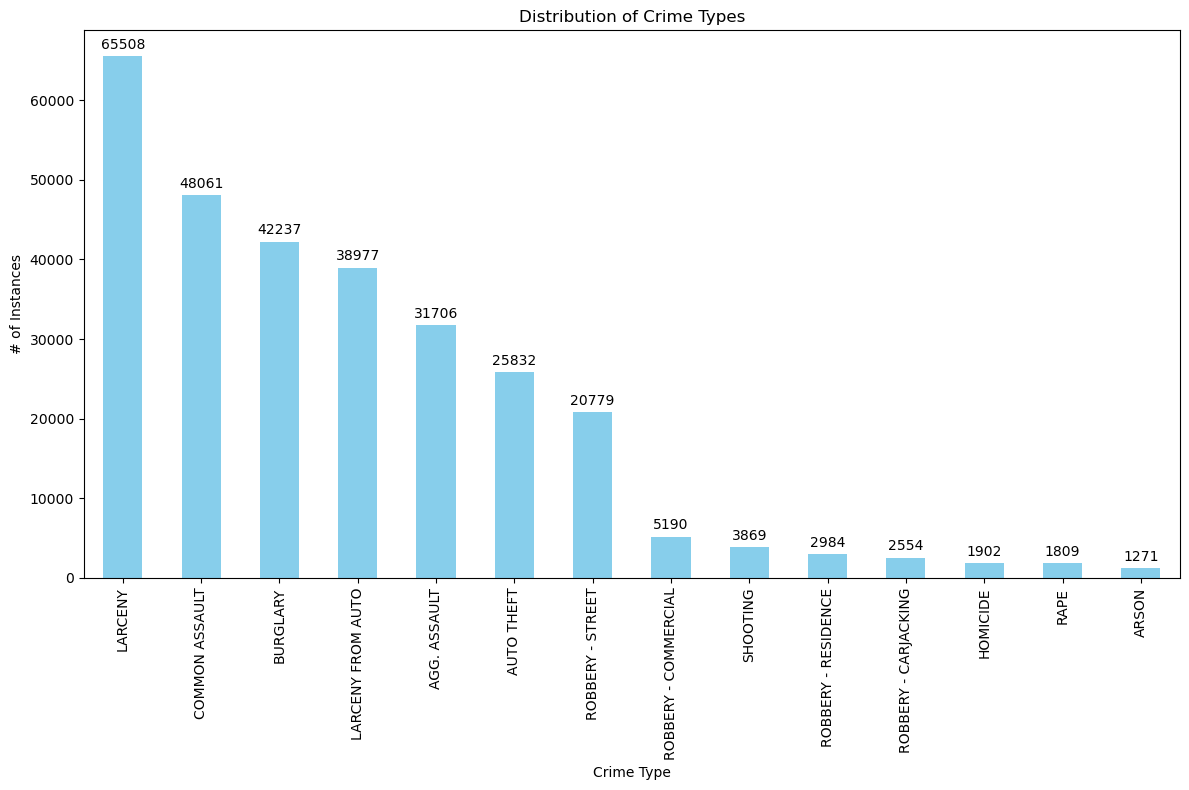

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the crime descriptions from the "Description" column
crime_descriptions = df['Description']

# Count the occurrences of each crime type
crime_type_counts = crime_descriptions.value_counts()

# Create a bar chart for crime type distribution
plt.figure(figsize=(12, 8))
ax = crime_type_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Crime Type")
plt.ylabel("# of Instances")
plt.title("Distribution of Crime Types")
plt.xticks(rotation=90)
plt.tight_layout()

# Add labels for the number of instances on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    plt.annotate('{}'.format(int(height)),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()


## Creates a plot to illustrate how crime type distributions vary from year-to-year

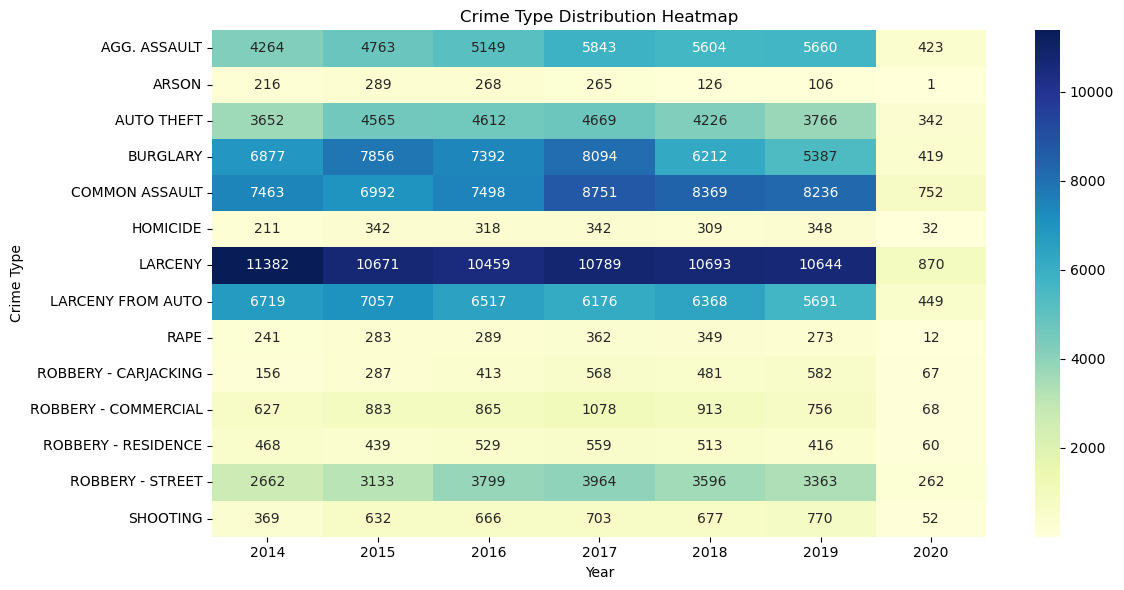

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the "CrimeDate" column to datetime
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Filter the data for the desired years (e.g., 2014 to 2020)
start_year = 2014
end_year = 2020
df_filtered = df[(df['CrimeDate'].dt.year >= start_year) & (df['CrimeDate'].dt.year <= end_year)]

# Pivot the data to create a DataFrame with years as columns and crime types as indices
crime_type_pivot = df_filtered.pivot_table(index='Description',
                                           columns=df_filtered['CrimeDate'].dt.year,
                                           aggfunc='size',
                                           fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(crime_type_pivot, cmap='YlGnBu', annot=True, fmt='d')
plt.xlabel("Year")
plt.ylabel("Crime Type")
plt.title("Crime Type Distribution Heatmap")
plt.tight_layout()

plt.show()


## Creates a plot to illustrate how crime type distributions vary from month-to-month

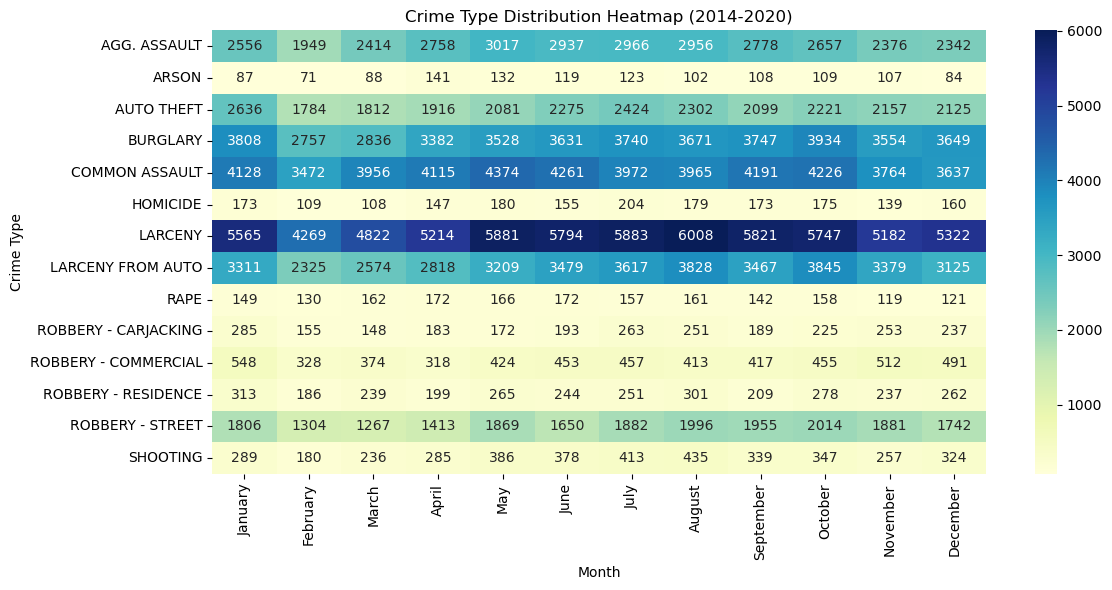

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the "CrimeDate" column to datetime
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Filter the data for the desired years (e.g., 2014 to 2020)
start_year = 2014
end_year = 2020
df_filtered = df[(df['CrimeDate'].dt.year >= start_year) & (df['CrimeDate'].dt.year <= end_year)]

# Extract the month from the "CrimeDate" column
df_filtered['Month'] = df_filtered['CrimeDate'].dt.month

# Define a list of month names
month_names = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Pivot the data to create a DataFrame with months as columns and crime types as indices
crime_type_pivot = df_filtered.pivot_table(index='Description',
                                           columns=df_filtered['Month'],
                                           aggfunc='size',
                                           fill_value=0)

# Create a heatmap with month names as column labels
plt.figure(figsize=(12, 6))
sns.heatmap(crime_type_pivot, cmap='YlGnBu', annot=True, fmt='d', xticklabels=month_names)
plt.xlabel("Month")
plt.ylabel("Crime Type")
plt.title("Crime Type Distribution Heatmap (2014-2020)")
plt.tight_layout()

plt.show()


## Creates a plot to illustrate how crime type distributions vary from day-of-week

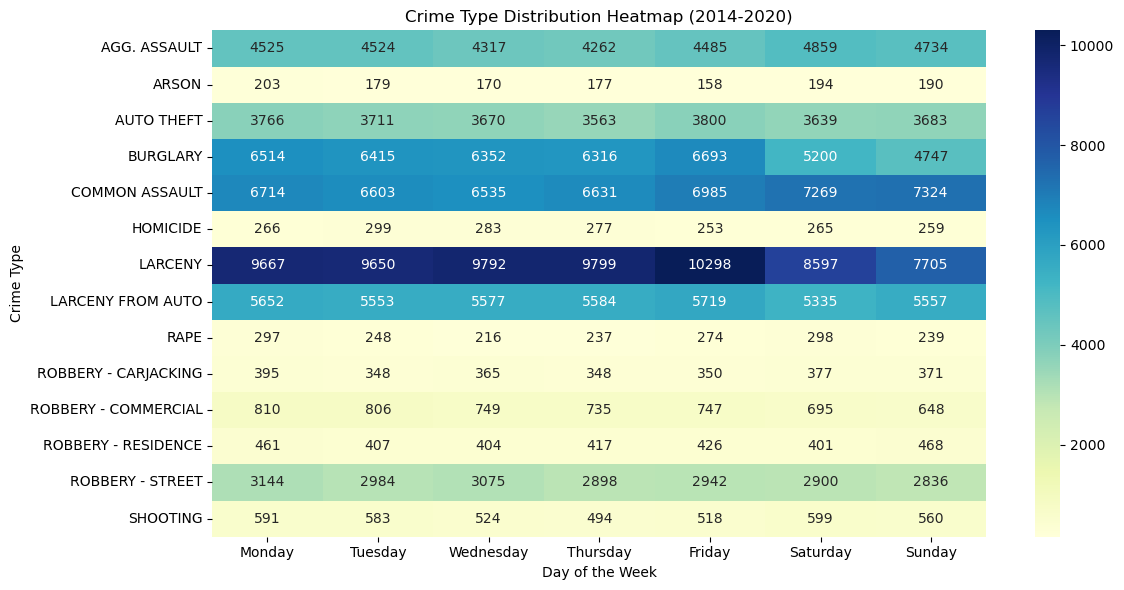

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the "CrimeDate" column to datetime
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Filter the data for the desired years (e.g., 2014 to 2020)
start_year = 2014
end_year = 2020
df_filtered = df[(df['CrimeDate'].dt.year >= start_year) & (df['CrimeDate'].dt.year <= end_year)]

# Extract the day of the week (0 = Monday, 6 = Sunday) from the "CrimeDate" column
df_filtered['DayOfWeek'] = df_filtered['CrimeDate'].dt.dayofweek

# Define day-of-the-week names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Pivot the data to create a DataFrame with day-of-the-week as columns and crime types as indices
crime_type_pivot = df_filtered.pivot_table(index='Description',
                                           columns=df_filtered['DayOfWeek'],
                                           aggfunc='size',
                                           fill_value=0)

# Create a heatmap with day-of-the-week names as column labels
plt.figure(figsize=(12, 6))
sns.heatmap(crime_type_pivot, cmap='YlGnBu', annot=True, fmt='d', xticklabels=day_names)
plt.xlabel("Day of the Week")
plt.ylabel("Crime Type")
plt.title("Crime Type Distribution Heatmap (2014-2020)")
plt.tight_layout()

plt.show()


## Create a plot to illustrate how crime type distributions vary from District

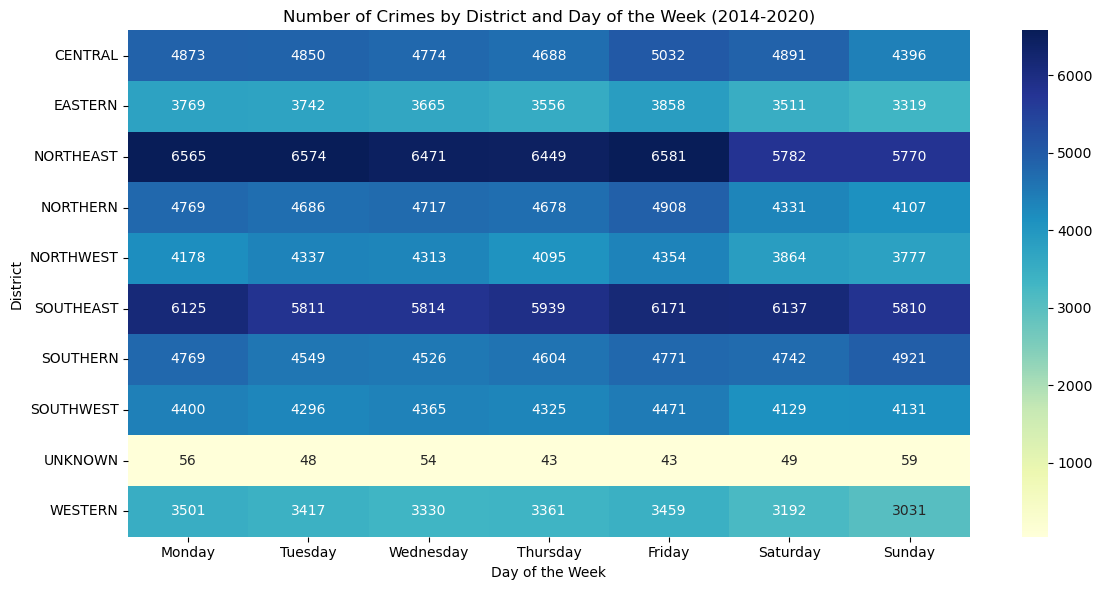

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the "CrimeDate" column to datetime
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

# Filter the data for the desired years (e.g., 2014 to 2020)
start_year = 2014
end_year = 2020
df_filtered = df[(df['CrimeDate'].dt.year >= start_year) & (df['CrimeDate'].dt.year <= end_year)]

# Create a new column for the day of the week (0 = Monday, 6 = Sunday)
df_filtered['DayOfWeek'] = df_filtered['CrimeDate'].dt.dayofweek

# Define day-of-the-week names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a pivot table to count the number of crimes for each district and day of the week
pivot_table = df_filtered.pivot_table(index='District',
                                      columns='DayOfWeek',
                                      values='CrimeDate',
                                      aggfunc='count',
                                      fill_value=0)

# Reorder columns based on the day of the week
pivot_table = pivot_table[range(7)]

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', xticklabels=day_names)
plt.xlabel("Day of the Week")
plt.ylabel("District")
plt.title("Number of Crimes by District and Day of the Week (2014-2020)")
plt.tight_layout()

plt.show()
